In [21]:
#Importing the dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

In [3]:
#Reading the calories data as a pandas dataframe
calories_df = pd.read_csv('calories.csv')

#Viewing the first five rows of the df
calories_df.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [5]:
#Reading the excercise data as a pandas df
exercise_df = pd.read_csv('exercise.csv')

#Viewing the first five rows of the df
exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [8]:
#Concatenating the two dataframe together
df = pd.concat([exercise_df,calories_df['Calories']],axis = 1)

In [9]:
#Viewing the new df
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [10]:
#Viewing the shape of the df
df.shape

(15000, 9)

In [11]:
#Checking for null values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
#Checking for additional info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [17]:
#Statistial summary of the df
df.describe().transpose()

count          mean           std         min          25%  \
User_ID     15000.0  1.497736e+07  2.872851e+06  10001159.0  12474190.75   
Age         15000.0  4.278980e+01  1.698026e+01        20.0        28.00   
Height      15000.0  1.744651e+02  1.425811e+01       123.0       164.00   
Weight      15000.0  7.496687e+01  1.503566e+01        36.0        63.00   
Duration    15000.0  1.553060e+01  8.319203e+00         1.0         8.00   
Heart_Rate  15000.0  9.551853e+01  9.583328e+00        67.0        88.00   
Body_Temp   15000.0  4.002545e+01  7.792299e-01        37.1        39.60   
Calories    15000.0  8.953953e+01  6.245698e+01         1.0        35.00   

                   50%          75%         max  
User_ID     14997285.0  17449278.75  19999647.0  
Age               39.0        56.00        79.0  
Height           175.0       185.00       222.0  
Weight            74.0        87.00       132.0  
Duration          16.0        23.00        30.0  
Heart_Rate        96.0       103.00       128.0  
Body_Temp         40.2        40.60        41.5  
Calories          79.0       138.00       314.0

/tmp/ipykernel_23393/109535458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


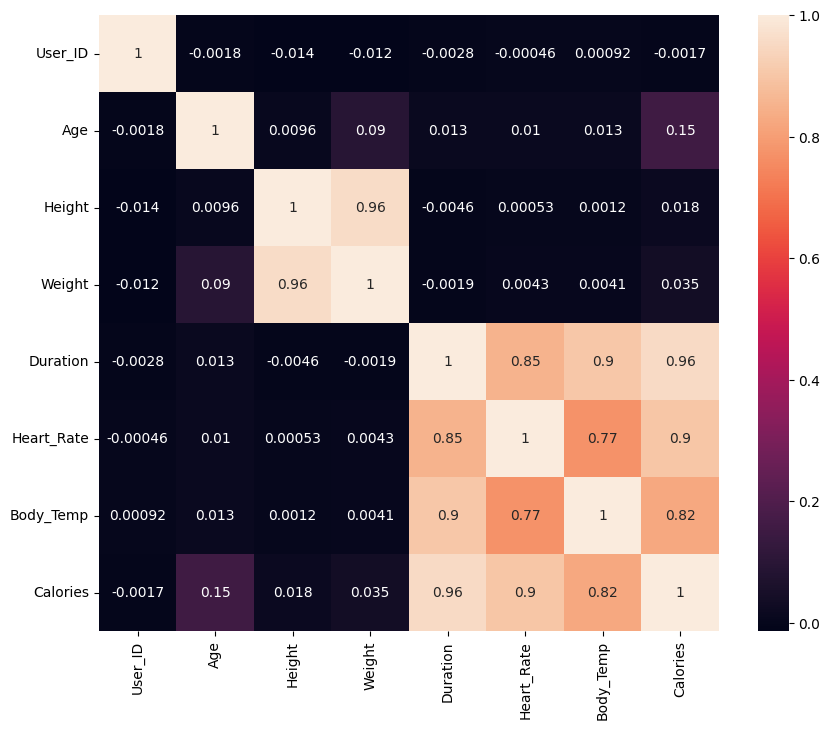

In [15]:
#Viewing the correlation between the variables in the df
corr = df.corr()

plt.figure(figsize= (10,8))
sns.heatmap(corr, annot = True)
plt.show()

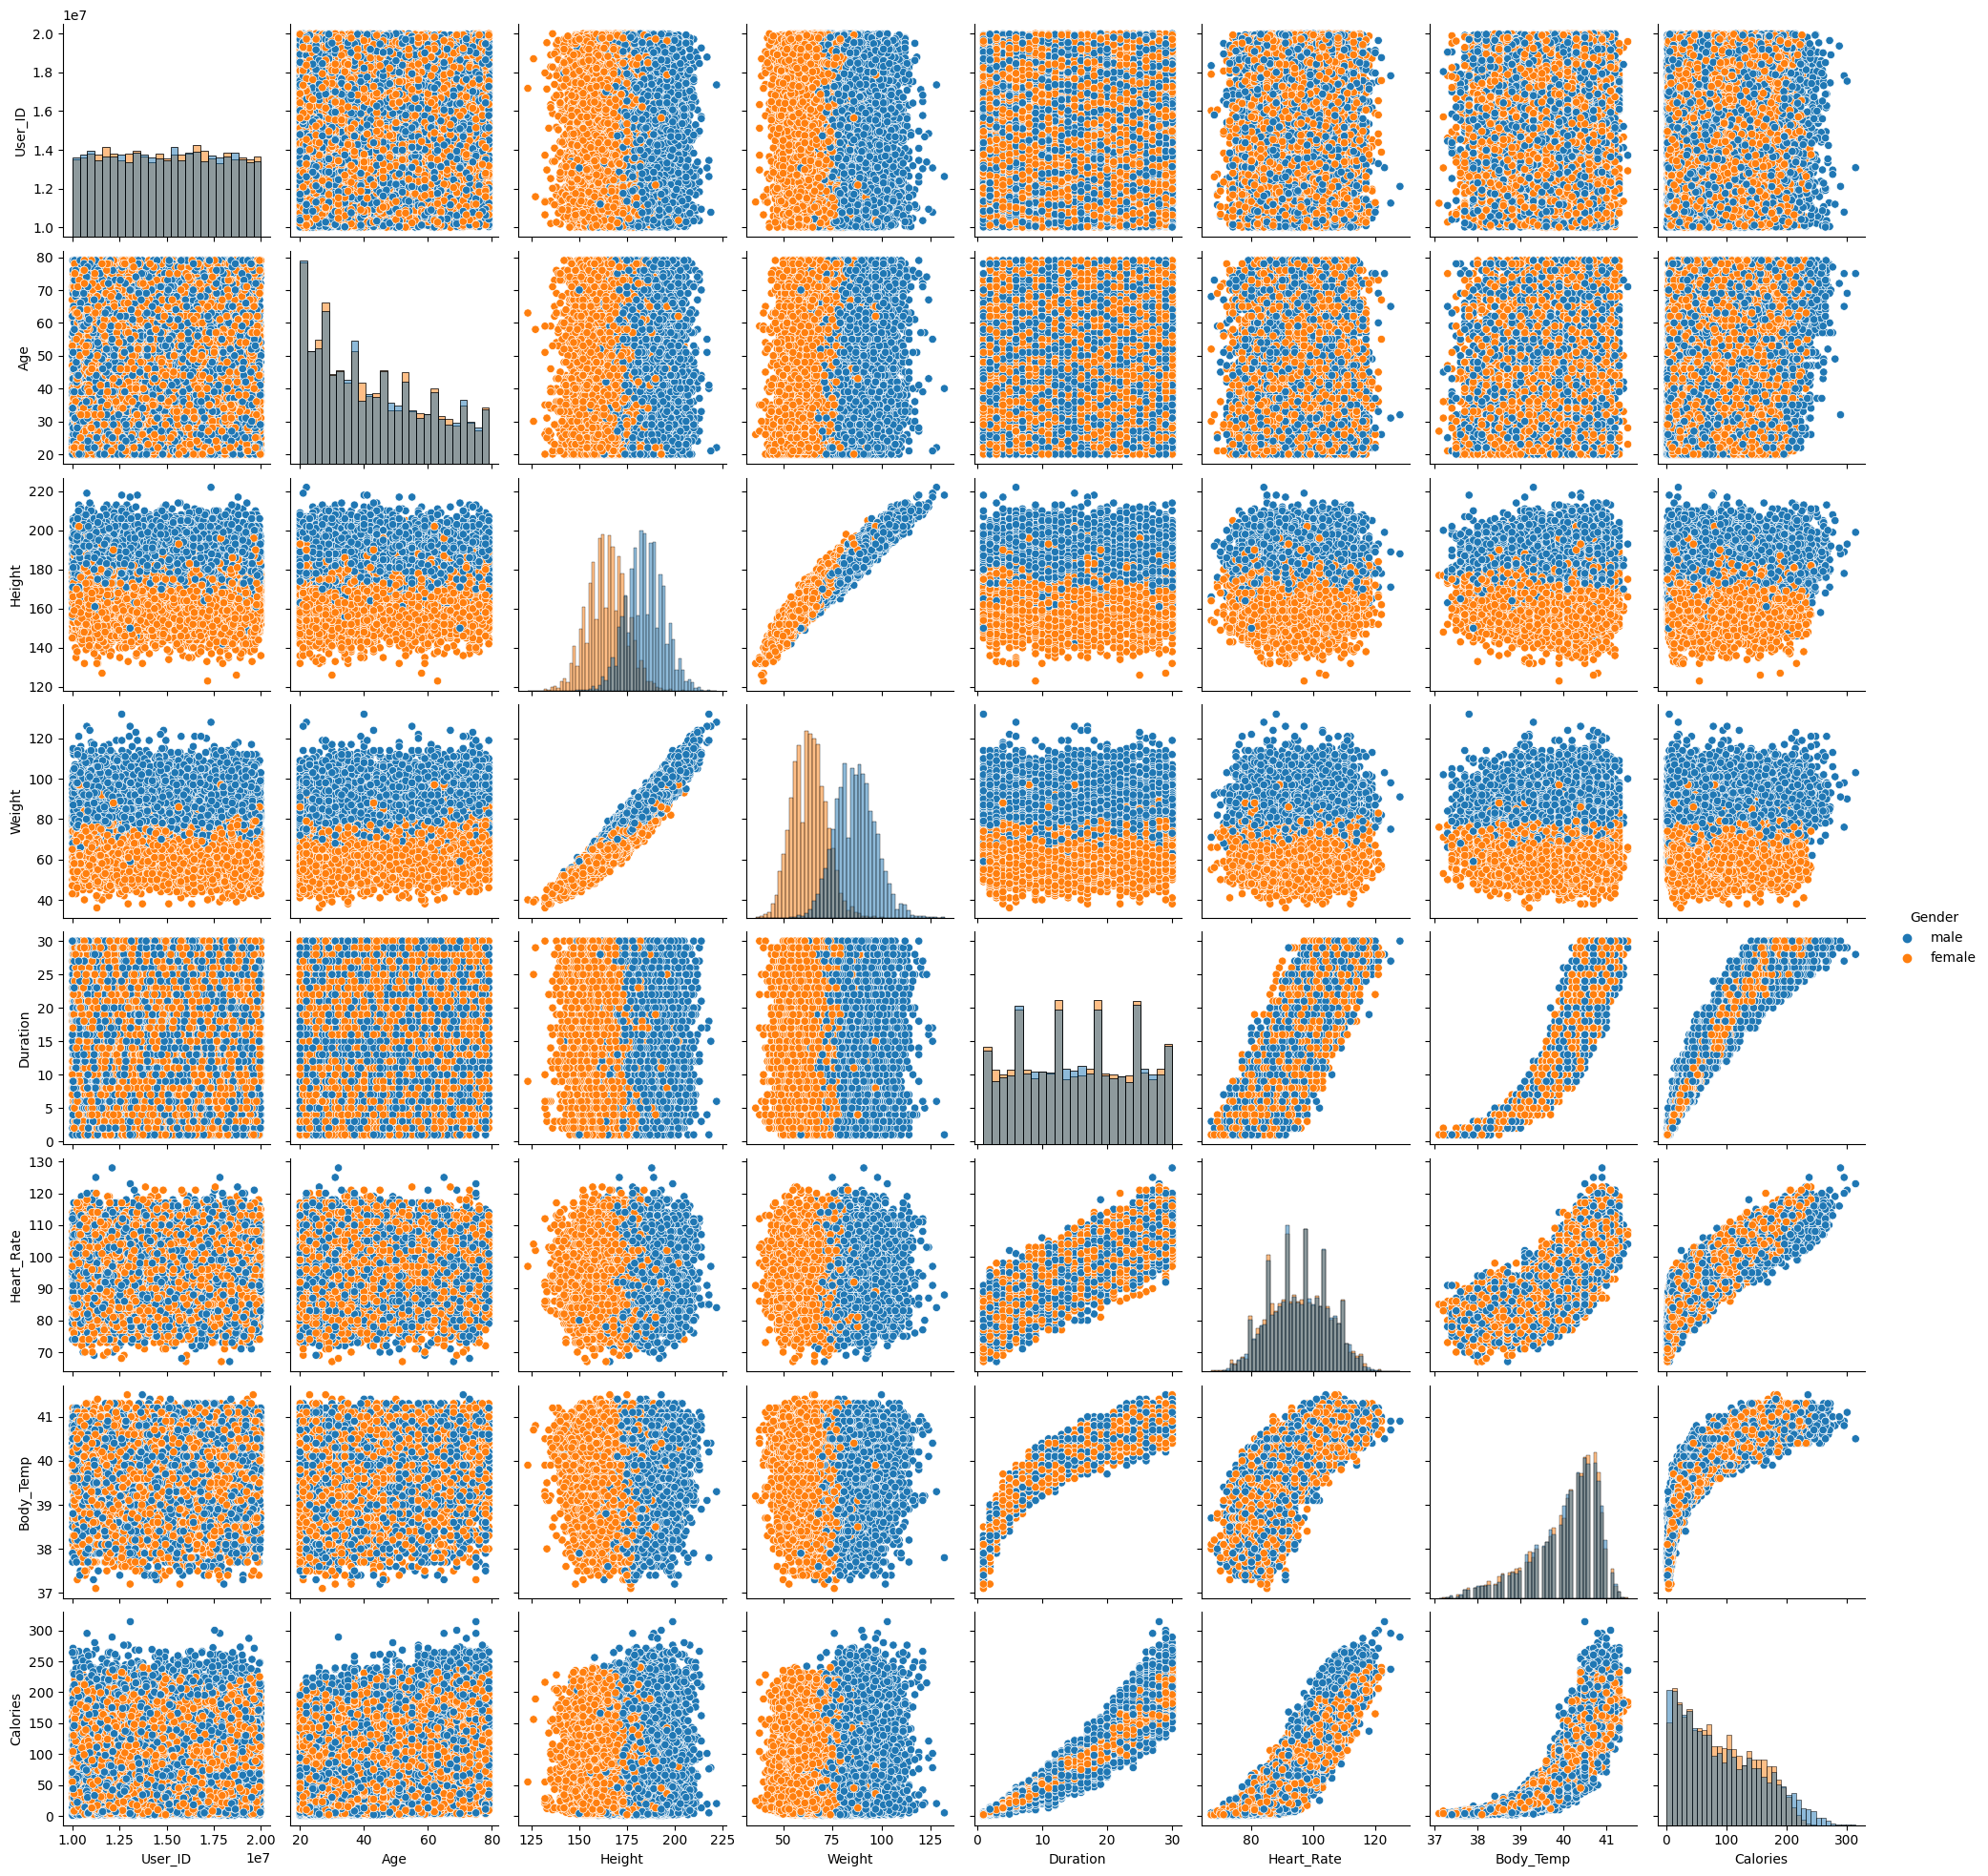

In [14]:
#Checking the distribution of the df
sns.pairplot(df, hue = 'Gender', diag_kind = 'hist')
plt.show()

In [16]:
#Splitting the data into features and label
X = df.drop('Calories', axis = 1)
y = df['Calories'].values

In [23]:
#Encoding the categorical features
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X['Gender'])

In [24]:
#Seperating the data into training and test data
SEED = 990
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = SEED)

#Validating the split
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(15000, 8) (10500, 8) (4500, 8)
(15000,) (10500,) (4500,)


In [29]:
#Creating a StandardScaler instance
ss = StandardScaler()
#Standardizing the training data
X_train_scaled = ss.fit_transform(X_train)

#Standardizing the test data
X_test_scaled = ss.fit_transform(X_test)

## Model Building

In [30]:
#Creating an instance of the model
model = xgb.XGBRegressor()

In [31]:
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Model Evaluation

In [32]:
#Test data prediction
predictions = model.predict(X_test_scaled)

#mean absolute error
mae = metrics.mean_absolute_error(predictions,y_test)

print(f"The mean absolute error is: {mae}")

The mean absolute error is: 1.59878059978452


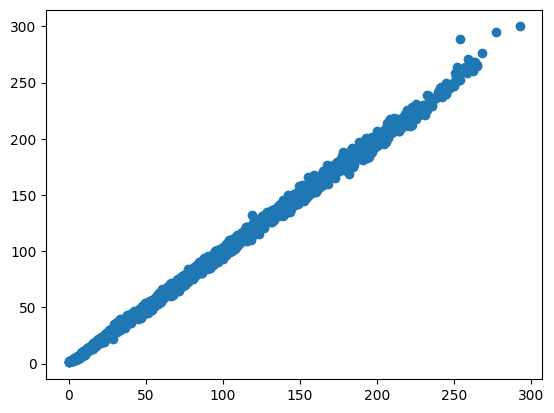

In [35]:
#Visualizing the predicted and actual value
plt.scatter(predictions,y_test)
plt.show()